# 0. 前言


概率论和统计学是数据科学的基本支柱，机器学习和人工智能的底层原理也无非就是概率论和统计学和线性代数。要想在这些领域有所作为，对它们背后的数学原理有一些深入的理解是必要条件。本系列将从实用的角度来一个关于概率论和统计学的飞掠之旅（也就是说不会太纠结于繁琐的概念描述、数学推导和定理证明，一切以实用为指导原则），特别地，借助于python中的scipy.stats模块进行一些编程实验，也帮助获得一些直观认识，这些编程实验本身也是实际应用中经常需要用到的技巧。

首先，我们要先了解一些基本概念。


## 0.1 常见离散概率分布

. 伯努利分布
. 二项式分布
. 几何分布
. 负二项式分布
. 超几何分布
. Poisson分布
. 离散均匀分布

## 0.2 常见连续概率分布
4.1	均匀分布
4.2	正态分布
4.2.1	正态分布与二项分布的关系
4.3	伽玛分布
4.4	指数分布
4.5	其他连续型常用分布
4.5.1	贝它分布
4.5.2	双指数分布
4.5.3	对数正态分布
4.5.4	帕雷托分布
4.5.5	柯西分布
4.6	多元正态分布



# 1. 随机变量

## 1.1 随机事件及其概率

随机试验（random experiment） 是概率论中的一个重要术语，它包含以下特点：

(1) 可以在相同条件下重复进行

(2) 每次试验的可能结果不止一个，并且能事先明确试验的所有可能结果

(3) 进行一次试验之前不能确定哪一个结果会出现

随机试验$E$ 的所有可能结果组成的集合，称为样本空间，记为$S$ ；样本空间$S$中的每一个结果称为样本点，记为$e$。样本空间的子集称为随机事件，用大写字母表示，比如$A \subset S$，每一个样本点$e$当然也是样本空间的一个子集，所以也是一个随机事件，称为基本事件。

比如掷一个六面体的骰子是一个典型的随机试验，其样本空间是：$S={1,2,3,4,5,6}$

其中“3”表示3点朝上，是一个样本点，也是一个随机事件。



## 1.2 概率

虽然随机试验的每一次试验的结果是无法预先知道的，但是，当试验的次数足够多的时候，直感告诉我们比如说在以上掷骰子试验中，1,2,3,4,5,6出现的次数应该是基本相同（假设骰子是公正的）的。因为骰子的6个面没有哪个是特殊的，所以它们出现的次数应该大抵相同！这里涉及到所谓的等可能概型的概念（这可以参考Ref1的解释）。用概率论的语言来说就是每个点数出现的概率都是1/6.

概率的定义：设 $E$是随机试验， $S$是它的样本空间。对于 $E$ 的每一事件 $A$ 赋予一个实数，记为$P(A)$，称为事件 $A$[公式] 的概率，如果集合函数 $P(*)$ 满足如下条件：

(1) 非负性：对于每一个事件 $A$ ，有 $0 \leq P(A) \leq 1$

(2) 规范性：对于必然事件 $S$ ，有 $P(S) = 1$

(3) 可列可加性：设 $A_1,A_2,...$是两两互斥的事件，有$P(A_1 \cup A_2...)=P(A_1)+P(A_2)+...$ 

相关概念：等可能概型，古典概型，频数，频率，概率，大数定律...


## 1.2 随机变量

随机变量（random variable）表示随机现象或者随机试验的各种可能结果的实值单值函数。注意，随机变量虽然名为变量，其实质上是一个函数！也就是如前所述的将随机事件映射为某个数值的实值单值函数，其定义如下：

设随机试验的样本空间为$S={e}$. $X = X(e)$是定义在样本空间S上的实值单值函数，称X为随机变量。

随机事件不论与数量是否直接有关，都可以数量化，即都能用数量化的方式表达。随机事件数量化的好处是可以用数学分析的方法来研究随机现象。例如某一时间内公共汽车站等车乘客人数，电话交换台在一定时间内收到的呼叫次数，灯泡的寿命等等，都是随机变量的实例。

根据随机变量的所有可能取的值，可以把它们分为两种基本类型：离散随机变量和连续随机变量


## 1.3 离散随机变量

离散型（discrete）随机变量是指在取值范围内的变量的可能取值为有限个或可数个。例如某地区某年人口的出生数、死亡数，某药治疗某病病人的有效数、无效数，扔N次硬币中得到k次正面朝上的次数，扔一个骰子所得到的点数等等。


## 1.4 连续随机变量

连续型（continuous）随机变量即在一定区间内变量取值有无限个，或数值无法一一列举出来。例如某地区男性健康成人的身长值、体重值，一批传染性肝炎患者的血清转氨酶测定值等。

## 1.5 随机变量的概率分布

笼统地说，随机变量的概率分布反映的就是随机变量取不同可能的值的概率，可简称为概率函数，详细参见下一节。

需要注意的是，在有些术语方面不同的书中不尽相同。比如说Ref1中没有出现过概率质量函数这个词，而是用分布律替代。又比如，Ref1中用分布函数来指代累积分布函数(CDF)，等等（若干年前第一次学习概率论用的教材就是Ref1，但是若干年后回头来看至少对“分布函数”这个提法不是很认同^-^）。

离散型随机变量遵循的概率分布称为离散概率分布，典型的有伯努利分布、二项分布、几何分布和泊松分布等等。

连续型随机变量遵循的概率分布称为连续概率分布，典型的有均匀分布、正态（高斯）分布、伽马分布、指数分布等等。


# 2. 概率函数

概率函数(probability function)是用以刻画随机变量的最基本的概率特性的函数。离散随机变量和连续随机变量的概率函数的表现形式略有不同。

离散随机变量的最基本的概率函数称为概率质量函数（PMF: Probability Mass Functions）,连续随机变量的最基本的概率函数称为概率密度函数（PMF: Probability Mass Functions）。

除了PMF和PDF还有其它一些常见的概率函数，如累积分布函数(CDF: Cumulative Distribution Function)，百分点函数(PPF, Percent Point Function)，风险函数(Hazard Function)，生存函数(Survial Function)等等

# 2.1 概率质量函数

离散随机变量的概率函数称为概率质量函数（PMF)记为$p(x)$，是满足以下性质的函数：

(1) p(x)表示随机变量X取值为x的概率，即$p(x)=Prob[=x]=Pr[X=x]=P[X=x]$. 三种表示概率的方法都可以，最后一个最简单常见.但是要注意的一点，通常用方括号[]而不是圆括号()表示概率

(2) p(x)为非负实数

(3) 对所有可能的x进行针对p(x)的求和结果为1，即$\sum\limits_{x\in\Omega}p(x)=1$, $\Omega$表示X的所有可能取值集合

由(2)和(3)可以很容易地推出$0<=p(x)<=1$.


# 2.2 概率密度函数

连续随机变量的概率函数称为概率密度函数(PDF)记为$f(x)$(注意，当然也可以记为$p(x)$，或其它任何符号，只要从上文保持一致且能根据上下文正确地分辨即可)，是满足以下性质的函数：

(1) 随机变量取值在a和b两点之间的概率为：$P[a≤x≤b] = \int_a^bf(x)dx$

(2) $f(x) >= 0$对所有x成立

(3) $\int_{-\infty}^{\infty}f(x)dx = 1$

由于连续随机变量可以取（一定区间内的）任意值，因此从数学的角度来说它取任意某一个特定的值的概率都是0（！与离散随机变量不同），概率只能在一个区间上进行评估而不能针对某一个点进行评估，具体来说，区间[a,b]之间的概率等于函数f(x)在[a,b]内所围成的区域的面积。与离散随机变量的概率函数另一个不同点是，f(x)在某些点或者某些区间可以大于1！

下图为正态分布的概率密度函数示意图。

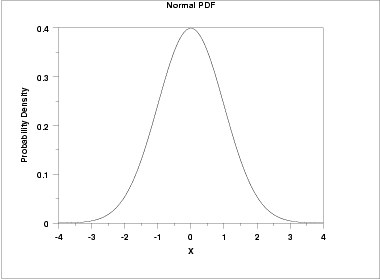


## 2.3 累积分布函数


累积分布函数（CDF）的定义为：$F(x)=Pr[X≤x]$

对于连续分布，它可以表示为概率密度函数的积分：$F(x)=Pr[X≤x]=\int_{-\infty}^x f(\mu)d\mu$

对于离散分布，它可以表示为概率质量函数的求和：$F(x)=Pr[X≤x]=\sum_{\mu \leq x} p(\mu)$

下图为正态分布的l累积分布函数示意图。

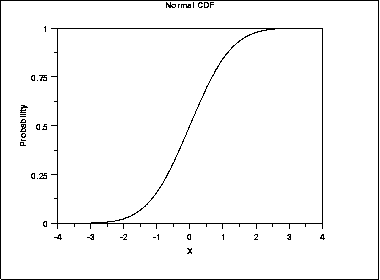


## 2.4 百分点函数(PPF)


百分点函数是累积分布函数的反函数，所以PPF也常被称为逆分布函数，记为$G$,其定义为：$$x=G(q)=F^{-1}(q) \Leftrightarrow Pr[X<x]=q $$       

PPF的输入是一个概率值q，返回的是x值，使得该x对应的累积分布函数值等于q。

下图为正态分布的百分点函数示意图。

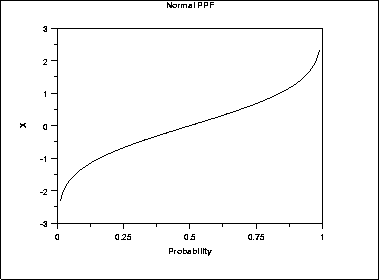

由反函数性质可知，百分位函数的曲线与累积分布函数曲线以直线y=x为轴对称。


## 2.5 Survival Function	

生存函数常用于可靠性分析相关领域，它的定义如下：$S(x)=Pr[X>x]=1−F(x)$

所以生存函数可以理解为是累积分布函数的互补函数，所以也被称为CCDF(complementaty cumulative distribution function)?

下图为正态分布的生存函数示意图。

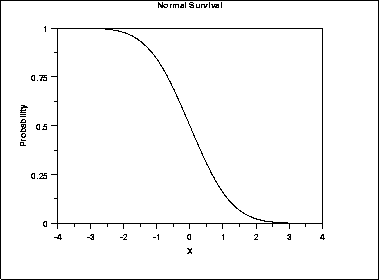


## 2.6 Inverse Survival Function	


正如累积分布函数的逆函数为百分点函数一样，生存函数也有它的逆函数（只不过比较衰的是它并没有一个自己的专用名称^-^），这里记为$Z$.

由于累积分布函数与百分点函数以及生存函数的关系，逆生存函数可以基于百分点函数定义为：$Z(\alpha)=G(1−\alpha)$


下图为正态分布的逆生存函数示意图。

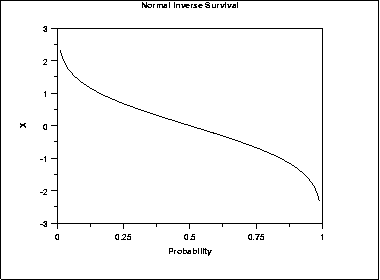


## 2.7 风险函数Hazard Function	

风险函数是概率密度函数（或者对于离散分布来说是概率质量函数）与生存函数之比，即：$$h(x)=\frac{f(x)}{S(x)}=\frac{f(x)}{1−F(x)}$$

正态分布的风险函数如下图所示：

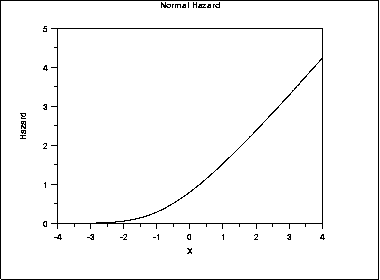

## 2.8 累积风险函数 Cumulative Hazard Function	


顾名思义，累积风险函数即为风险函数的积分：$$H(x)=\int_{-\infty}^{x}h(\mu)d\mu = -ln(1-F(x))$$

正态分布的累积风险函数如下图所示：

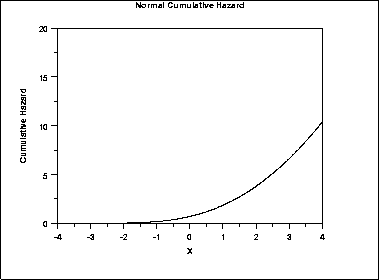

# Probability Distributions in Python Tutorial

ref: https://www.datacamp.com/community/tutorials/probability-distributions-python



Random Variable








In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\chenxy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
# import uniform distribution
from scipy.stats import uniform

# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

C:\Users\chenxy\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

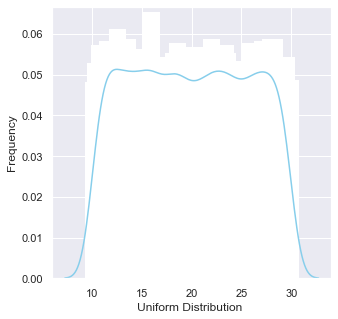

In [5]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

# 6 Common Probability Distributions every data science professional should know

ref: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

Introduction
Welcome to the world of Probability in Data Science! Let me start things off with an intuitive example.

Suppose you are a teacher at a university. After checking assignments for a week, you graded all the students. You gave these graded papers to a data entry guy in the university and tell him to create a spreadsheet containing the grades of all the students. But the guy only stores the grades and not the corresponding students.



He made another blunder, he missed a couple of entries in a hurry and we have no idea whose grades are missing. Let’s find a way to solve this.

One way is that you visualize the grades and see if you can find a trend in the data.



The graph that you have plot is called the frequency distribution of the data. You see that there is a smooth curve like structure that defines our data, but do you notice an anomaly? We have an abnormally low frequency at a particular score range. So the best guess would be to have missing values that remove the dent in the distribution.

This is how you would try to solve a real-life problem using data analysis. For any Data Scientist, a student or a practitioner, distribution is a must know concept. It provides the basis for analytics and inferential statistics.

While the concept of probability gives us the mathematical calculations, distributions help us actually visualize what’s happening underneath.

In this article, I have covered some important probability distributions which are explained in a lucid as well as comprehensive manner.

Note: This article assumes you have a basic knowledge of probability. If not, you can refer this probability distributions.

 

Table of Contents
Common Data Types
Types of Distributions
Bernoulli Distribution
Uniform Distribution
Binomial Distribution
Normal Distribution
Poisson Distribution
Exponential Distribution
Relations between the Distributions
Test your Knowledge!
 

Common Data Types
Before we jump on to the explanation of distributions, let’s see what kind of data can we encounter. The data can be discrete or continuous.

Discrete Data, as the name suggests, can take only specified values. For example, when you roll a die, the possible outcomes are 1, 2, 3, 4, 5 or 6 and not 1.5 or 2.45.

Continuous Data can take any value within a given range. The range may be finite or infinite. For example, A girl’s weight or height, the length of the road. The weight of a girl can be any value from 54 kgs, or 54.5 kgs, or 54.5436kgs.

Now let us start with the types of distributions.

 

Types of Distributions
Bernoulli Distribution
Let’s start with the easiest distribution that is Bernoulli Distribution. It is actually easier to understand than it sounds!

All you cricket junkies out there! At the beginning of any cricket match, how do you decide who is going to bat or ball? A toss! It all depends on whether you win or lose the toss, right? Let’s say if the toss results in a head, you win. Else, you lose. There’s no midway.

A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial. So the random variable X which has a Bernoulli distribution can take value 1 with the probability of success, say p, and the value 0 with the probability of failure, say q or 1-p.

Here, the occurrence of a head denotes success, and the occurrence of a tail denotes failure.
Probability of getting a head = 0.5 = Probability of getting a tail since there are only two possible outcomes.

The probability mass function is given by: px(1-p)1-x  where x € (0, 1).
It can also be written as



The probabilities of success and failure need not be equally likely, like the result of a fight between me and Undertaker. He is pretty much certain to win. So in this case probability of my success is 0.15 while my failure is 0.85

Here, the probability of success(p) is not same as the probability of failure. So, the chart below shows the Bernoulli Distribution of our fight.



 

Here, the probability of success = 0.15 and probability of failure = 0.85. The expected value is exactly what it sounds. If I punch you, I may expect you to punch me back. Basically expected value of any distribution is the mean of the distribution. The expected value of a random variable X from a Bernoulli distribution is found as follows:

E(X) = 1*p + 0*(1-p) = p

The variance of a random variable from a bernoulli distribution is:

V(X) = E(X²) – [E(X)]² = p – p² = p(1-p)

There are many examples of Bernoulli distribution such as whether it’s going to rain tomorrow or not where rain denotes success and no rain denotes failure and Winning (success) or losing (failure) the game.

 

Uniform Distribution
When you roll a fair die, the outcomes are 1 to 6. The probabilities of getting these outcomes are equally likely and that is the basis of a uniform distribution. Unlike Bernoulli Distribution, all the n number of possible outcomes of a uniform distribution are equally likely.

A variable X is said to be uniformly distributed if the density function is:



The graph of a uniform distribution curve looks like



You can see that the shape of the Uniform distribution curve is rectangular, the reason why Uniform distribution is called rectangular distribution.

For a Uniform Distribution, a and b are the parameters. 

The number of bouquets sold daily at a flower shop is uniformly distributed with a maximum of 40 and a minimum of 10.

Let’s try calculating the probability that the daily sales will fall between 15 and 30.

The probability that daily sales will fall between 15 and 30 is (30-15)*(1/(40-10)) = 0.5

Similarly, the probability that daily sales are greater than 20 is  = 0.667

The mean and variance of X following a uniform distribution is:

Mean -> E(X) = (a+b)/2

Variance -> V(X) =  (b-a)²/12

The standard uniform density has parameters a = 0 and b = 1, so the PDF for standard uniform density is given by:



 

Binomial Distribution
Let’s get back to cricket.  Suppose that you won the toss today and this indicates a successful event. You toss again but you lost this time. If you win a toss today, this does not necessitate that you will win the toss tomorrow. Let’s assign a random variable, say X, to the number of times you won the toss. What can be the possible value of X? It can be any number depending on the number of times you tossed a coin.

There are only two possible outcomes. Head denoting success and tail denoting failure. Therefore, probability of getting a head = 0.5 and the probability of failure can be easily computed as: q = 1- p = 0.5.

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials is called a Binomial Distribution.

The outcomes need not be equally likely. Remember the example of a fight between me and Undertaker? So, if the probability of success in an experiment is 0.2 then the probability of failure can be easily computed as q = 1 – 0.2 = 0.8.

Each trial is independent since the outcome of the previous toss doesn’t determine or affect the outcome of the current toss. An experiment with only two possible outcomes repeated n number of times is called binomial. The parameters of a binomial distribution are n and p where n is the total number of trials and p is the probability of success in each trial.

On the basis of the above explanation, the properties of a Binomial Distribution are

Each trial is independent.
There are only two possible outcomes in a trial- either a success or a failure.
A total number of n identical trials are conducted.
The probability of success and failure is same for all trials. (Trials are identical.)
 

The mathematical representation of binomial distribution is given by:



A binomial distribution graph where the probability of success does not equal the probability of failure looks like



Now, when probability of success = probability of failure, in such a situation the graph of binomial distribution looks like



The mean and variance of a binomial distribution are given by:

Mean -> µ = n*p

Variance -> Var(X) = n*p*q

 

Normal Distribution
Normal distribution represents the behavior of most of the situations in the universe (That is why it’s called a “normal” distribution. I guess!). The large sum of (small) random variables often turns out to be normally distributed, contributing to its widespread application. Any distribution is known as Normal distribution if it has the following characteristics:

The mean, median and mode of the distribution coincide.
The curve of the distribution is bell-shaped and symmetrical about the line x=μ.
The total area under the curve is 1.
Exactly half of the values are to the left of the center and the other half to the right.
A normal distribution is highly different from Binomial Distribution. However, if the number of trials approaches infinity then the shapes will be quite similar.

The PDF of a random variable X following a normal distribution is given by:



The mean and variance of a random variable X which is said to be normally distributed is given by:

Mean -> E(X) = µ

Variance -> Var(X) = σ^2

Here, µ (mean) and σ (standard deviation) are the parameters.
The graph of a random variable X ~ N (µ, σ) is shown below.



A standard normal distribution is defined as the distribution with mean 0 and standard deviation 1.  For such a case, the PDF becomes:





 

Poisson Distribution
Suppose you work at a call center, approximately how many calls do you get in a day? It can be any number. Now, the entire number of calls at a call center in a day is modeled by Poisson distribution. Some more examples are

The number of emergency calls recorded at a hospital in a day.
The number of thefts reported in an area on a day.
The number of customers arriving at a salon in an hour.
The number of suicides reported in a particular city.
The number of printing errors at each page of the book.
You can now think of many examples following the same course. Poisson Distribution is applicable in situations where events occur at random points of time and space wherein our interest lies only in the number of occurrences of the event.

A distribution is called Poisson distribution when the following assumptions are valid:

1. Any successful event should not influence the outcome of another successful event.
2. The probability of success over a short interval must equal the probability of success over a longer interval.
3. The probability of success in an interval approaches zero as the interval becomes smaller.

Now, if any distribution validates the above assumptions then it is a Poisson distribution. Some notations used in Poisson distribution are:

λ is the rate at which an event occurs,
t is the length of a time interval,
And X is the number of events in that time interval.
Here, X is called a Poisson Random Variable and the probability distribution of X is called Poisson distribution.

Let µ denote the mean number of events in an interval of length t. Then, µ = λ*t.

The PMF of X following a Poisson distribution is given by:



The mean µ is the parameter of this distribution. µ is also defined as the λ times length of that interval. The graph of a Poisson distribution is shown below:



The graph shown below illustrates the shift in the curve due to increase in mean.



It is perceptible that as the mean increases, the curve shifts to the right.

The mean and variance of X following a Poisson distribution:

Mean -> E(X) = µ
Variance -> Var(X) = µ

 

Exponential Distribution
Let’s consider the call center example one more time. What about the interval of time between the calls ? Here, exponential distribution comes to our rescue. Exponential distribution models the interval of time between the calls.

Other examples are:

1. Length of time beteeen metro arrivals,
2. Length of time between arrivals at a gas station
3. The life of an Air Conditioner

Exponential distribution is widely used for survival analysis. From the expected life of a machine to the expected life of a human, exponential distribution successfully delivers the result.

A random variable X is said to have an exponential distribution with PDF:

f(x) = { λe-λx,  x ≥ 0

and parameter λ>0 which is also called the rate.

For survival analysis, λ is called the failure rate of a device at any time t, given that it has survived up to t.

Mean and Variance of a random variable X following an exponential distribution:

Mean -> E(X) = 1/λ

Variance -> Var(X) = (1/λ)²

Also, the greater the rate, the faster the curve drops and the lower the rate, flatter the curve. This is explained better with the graph shown below.

 



To ease the computation, there are some formulas given below.
P{X≤x} = 1 – e-λx, corresponds to the area under the density curve to the left of x.

P{X>x} = e-λx, corresponds to the area under the density curve to the right of x.

P{x1<X≤ x2} = e-λx1 – e-λx2, corresponds to the area under the density curve between x1 and x2.

 

Relations between the Distributions
Relation between Bernoulli and Binomial Distribution
1. Bernoulli Distribution is a special case of Binomial Distribution with a single trial.

2. There are only two possible outcomes of a Bernoulli and Binomial distribution, namely success and failure.

3. Both Bernoulli and Binomial Distributions have independent trails.

 

Relation between Poisson and Binomial Distribution
Poisson Distribution is a limiting case of binomial distribution under the following conditions:

The number of trials is indefinitely large or n → ∞.
The probability of success for each trial is same and indefinitely small or p →0.
np = λ, is finite.
 

Relation between Normal and Binomial Distribution & Normal and Poisson Distribution:
Normal distribution is another limiting form of binomial distribution under the following conditions:

The number of trials is indefinitely large, n → ∞.
Both p and q are not indefinitely small.
The normal distribution is also a limiting case of Poisson distribution with the parameter λ →∞.

 

Relation between Exponential and Poisson Distribution:
If the times between random events follow exponential distribution with rate λ, then the total number of events in a time period of length t follows the Poisson distribution with parameter λt.

 

Ref1: 浙大版《概率论与数理统计》第四版

Ref2: https://itl.nist.gov/div898/handbook/eda

Ref3: https://baike.baidu.com/item/%E9%9A%8F%E6%9C%BA%E5%8F%98%E9%87%8F/828980